<a href="https://colab.research.google.com/github/vishalraul/NYC-Taxi-Time-Prediction/blob/main/2_NYC_Taxi_Trip_Time_Prediction_Capstone_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from importlib import reload
plt = reload(plt)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset Loading**

In [5]:
#loading the dataset

data = pd.read_csv('/content/drive/MyDrive/Capstone Project-02/NYC Taxi Data.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
#show last 5 rows
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [7]:
#size of the dataset
data.shape

(1458644, 11)

In [8]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
#Null value and its counts
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
#list of cloumns
list(data.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

## **EDA**

**vendor_id - a code indicating the provider associated with the trip record**

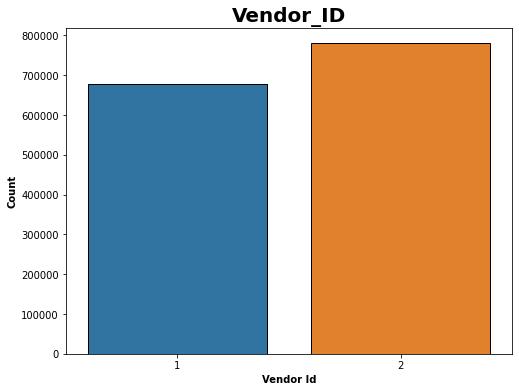

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data['vendor_id'], edgecolor='k')
plt.xlabel('Vendor Id',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Vendor_ID', fontweight='bold',fontsize=20)
plt.show()

* From abow bargraph, there are two service providers(vendor).
* Vendor 2 is most popular for New Yorkers.




In [12]:
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

**Store & forward Flage**

Text(0.5, 1.0, 'Store and Forward Flag')

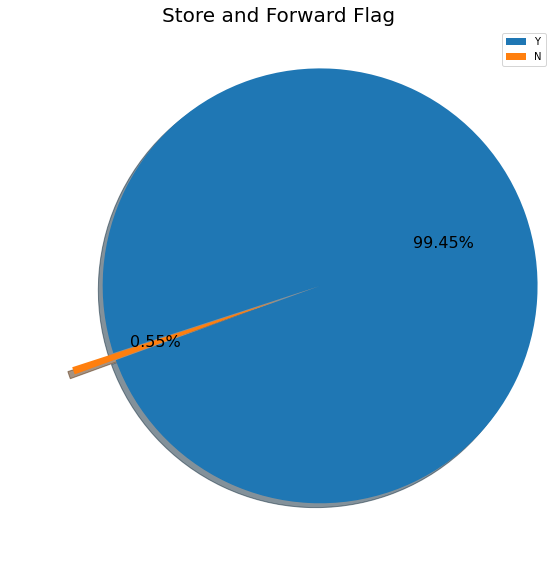

In [13]:
plt.figure(figsize=(10,10))
plt.pie(data['store_and_fwd_flag'].value_counts(),shadow = True, autopct = '%1.2f%%', explode =[0.2,0],startangle=200,textprops = {"fontsize":16} )
plt.legend(labels = ['Y','N'])
plt.title("Store and Forward Flag", fontsize=20)

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

* Visualizaton tell us that there were very few team of which record stored in memory due to no connection to the server.

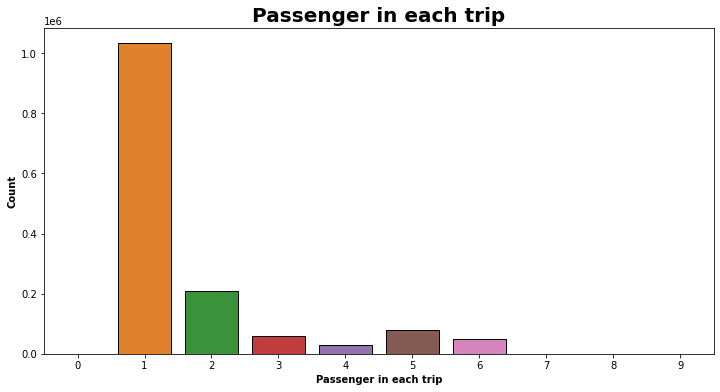

In [14]:
#PAssenger in each trip
plt.figure(figsize=(12,6))
sns.countplot(data['passenger_count'], edgecolor='k')
plt.xlabel('Passenger in each trip',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Passenger in each trip', fontweight='bold',fontsize=20)
plt.show()

* Above viz. tells us that there were most number of trips are done by Single passenger.
* 5 - 9 passengers trip states us that cab must be a Large vehicle.

In [15]:
'''
import plotly.express as px

fig = px.scatter_geo(data,lat='pickup_latitude',lon='pickup_longitude', hover_name="vendor_id")
fig.update_layout(title = 'Trip Location', title_x=0.5)
fig.show()
'''

'\nimport plotly.express as px\n\nfig = px.scatter_geo(data,lat=\'pickup_latitude\',lon=\'pickup_longitude\', hover_name="vendor_id")\nfig.update_layout(title = \'Trip Location\', title_x=0.5)\nfig.show()\n'

In [16]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['store_and_fwd_flag'] = encoder.fit_transform(data['store_and_fwd_flag'])
data['vendor_id'] = encoder.fit_transform(data['vendor_id'])

In [17]:
#details about features
np.round(data.describe(),3)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,0.535,1.665,-73.973,40.751,-73.973,40.752,0.006,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,0.074,5237.432
min,0.000,0.000,-121.933,34.360,-121.933,32.181,0.000,1.000
25%,0.000,1.000,-73.992,40.737,-73.991,40.736,0.000,397.000
50%,1.000,1.000,-73.982,40.754,-73.980,40.755,0.000,662.000
75%,1.000,2.000,-73.967,40.768,-73.963,40.770,0.000,1075.000
max,1.000,9.000,-61.336,51.881,-61.336,43.921,1.000,3526282.000


Text(0.5, 0, 'Passenger Count')

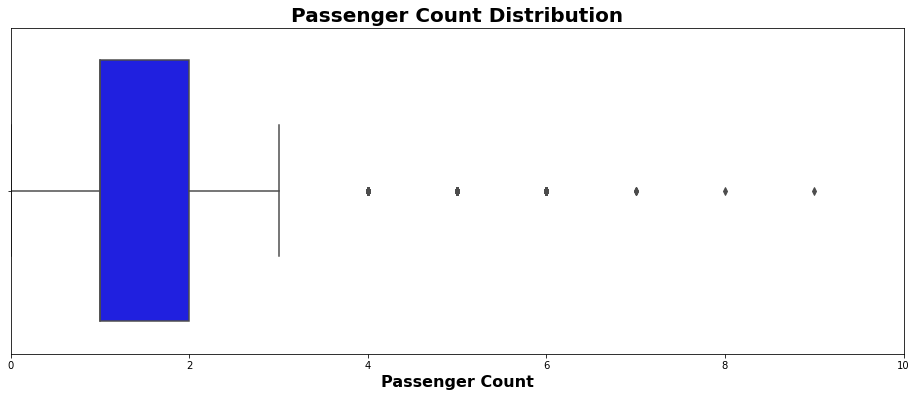

In [18]:
#Passenger Count during trip

plt.figure(figsize=(16,6))
sns.boxplot(data['passenger_count'], color='b')
plt.title('Passenger Count Distribution',fontsize=20, fontweight='bold')
plt.xlim(0,10)
plt.xlabel('Passenger Count',fontsize=16, fontweight='bold')

* In most of trip having 1-2 passengers.
* But in some trip there exist trip with 0 passenger, that means empty trip or data is recorded is not True.

Text(0.5, 0, 'Trip Duration')

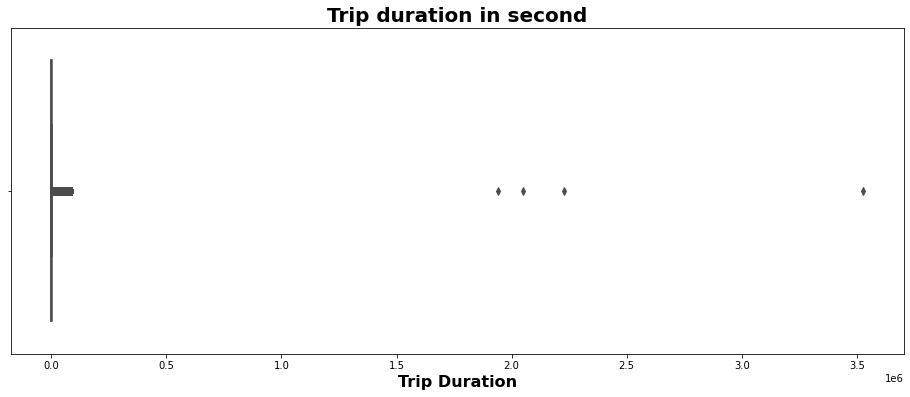

In [19]:
#trip duration
plt.figure(figsize=(16,6))
sns.boxplot(data['trip_duration'], color='b')
plt.title('Trip duration in second',fontsize=20, fontweight='bold')
plt.xlabel('Trip Duration',fontsize=16, fontweight='bold')

* From visualization its clearly see that there are some outlier in trip duration , their trip is between 1900000(528 hours) to somewhere around 3500000(972 hours) it is impossible in case of taxi trip.

In [20]:
#datatime function
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [21]:
#extraction from datetime
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_date'] = data['pickup_datetime'].dt.date
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_min'] = data['pickup_datetime'].dt.minute
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday

data['dropoff_min'] = data['dropoff_datetime'].dt.minute

In [22]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,2016-03-14,17,24,0,32
1,id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,2016-06-12,0,43,6,54
2,id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,2016-01-19,11,35,1,10
3,id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,2016-04-06,19,32,2,39
4,id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,2016-03-26,13,30,5,38


In [23]:
print(max(data['pickup_datetime']))
print(min(data['pickup_datetime']))

2016-06-30 23:59:39
2016-01-01 00:00:17


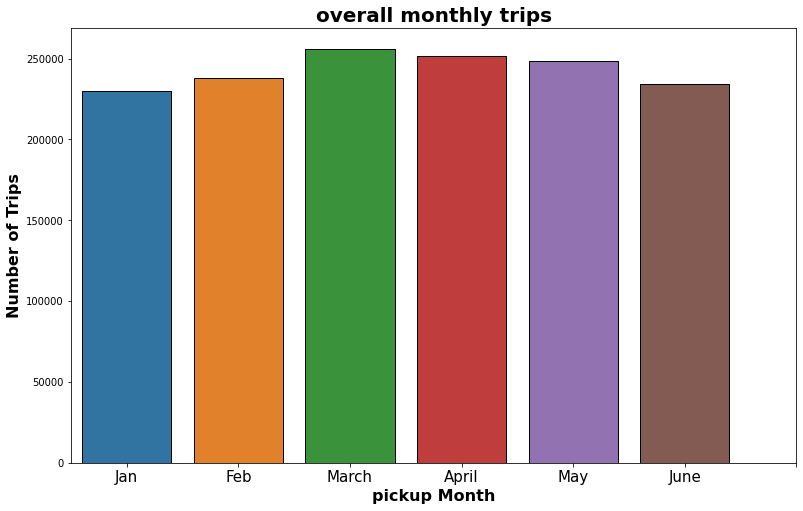

In [24]:
#monthly trip exploration

plt.figure(figsize=(13,8))
sns.countplot(data['pickup_month'], edgecolor='k')
plt.xlabel('pickup Month',fontweight='bold',fontsize=16)
plt.ylabel('Number of Trips',fontweight='bold',fontsize=16)
plt.xticks([0,1,2,3,4,5,6], labels=['Jan', 'Feb', 'March', 'April', 'May', 'June'], fontsize=15)
plt.title('overall monthly trips', fontweight='bold',fontsize=20)
plt.show()

* Number of trips in a particular month is Highest in March and April.

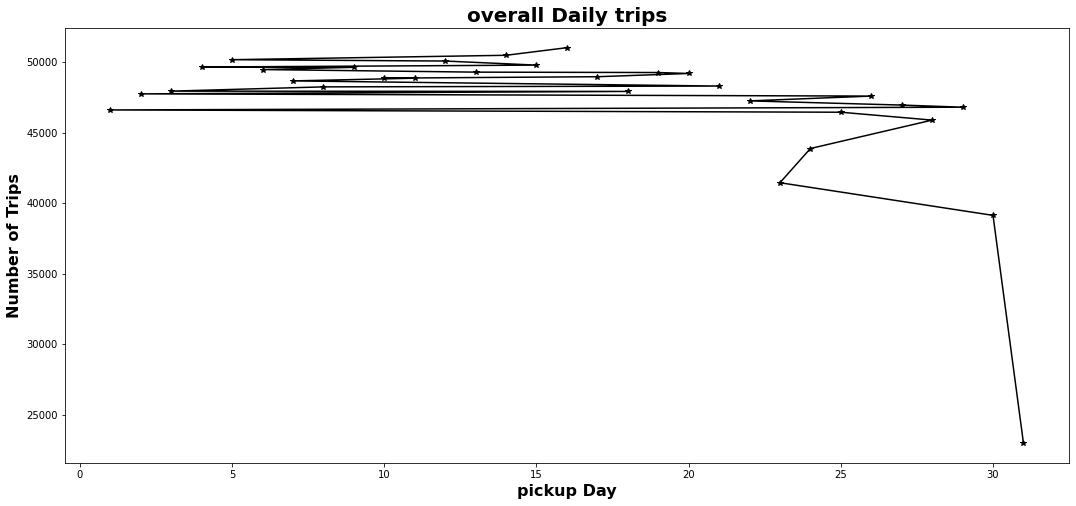

In [25]:
#Analyzing daily pickups
plt.figure(figsize=(18,8))
plt.plot(data['pickup_day'].value_counts(),color="black", marker="*")
plt.xlabel('pickup Day',fontweight='bold',fontsize=16)
plt.ylabel('Number of Trips',fontweight='bold',fontsize=16)
plt.title('overall Daily trips', fontweight='bold',fontsize=20)
plt.show()

* At Month end having low trips.

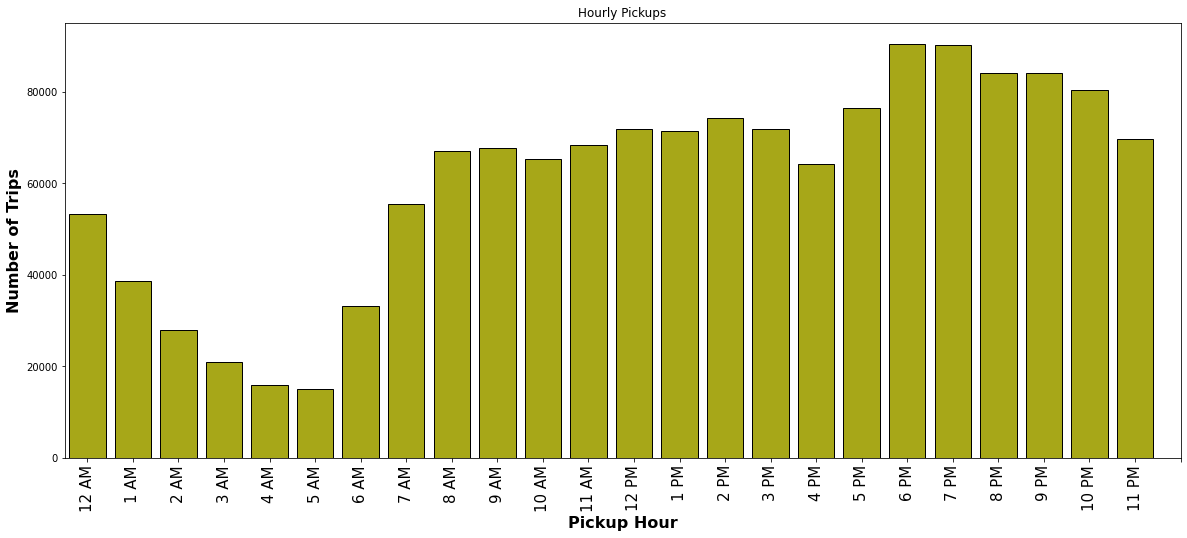

In [26]:
#Analyzing hourly pickups

plt.figure(figsize=(20,8))
sns.countplot(data['pickup_hour'],color= 'y', edgecolor='k')
plt.xlabel('Pickup Hour',fontweight='bold',fontsize=16)
plt.ylabel('Number of Trips',fontweight='bold',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], labels=['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM', '9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM', '9 PM','10 PM','11 PM'], fontsize=15, rotation=90)
plt.title('Hourly Pickups')
plt.show()

Maximum Pickups is between 5PM to 10PM ,probably office leaving time and most of people are moved towards market on evening.

In [27]:
'''
longitude = list(data.pickup_longitude) + list(data.dropoff_longitude)
latitude = list(data.pickup_latitude) + list(data.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.title('Scatterplot of Rides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()
'''

"\nlongitude = list(data.pickup_longitude) + list(data.dropoff_longitude)\nlatitude = list(data.pickup_latitude) + list(data.dropoff_latitude)\nplt.figure(figsize = (10,10))\nplt.title('Scatterplot of Rides')\nplt.xlabel('Longitude')\nplt.ylabel('Latitude')\nplt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)\nplt.show()\n"

## **Geo Spatical Analysis**

* I had created Interactive dashboard where you can choose filter from "vendor_id", "month" and "hour".
* There are total 2 plots , a 'pickup' and a 'dropoff' point plot.

1) vendor_id filter will let you choose the specific service provider and analyse its insights.


2) month filter will let you choose specific month to get insights on monthly basis.


3) hour filter permits you to observe patterns / trends in trips on hourly basis.

# **Pickup-Points analysis**

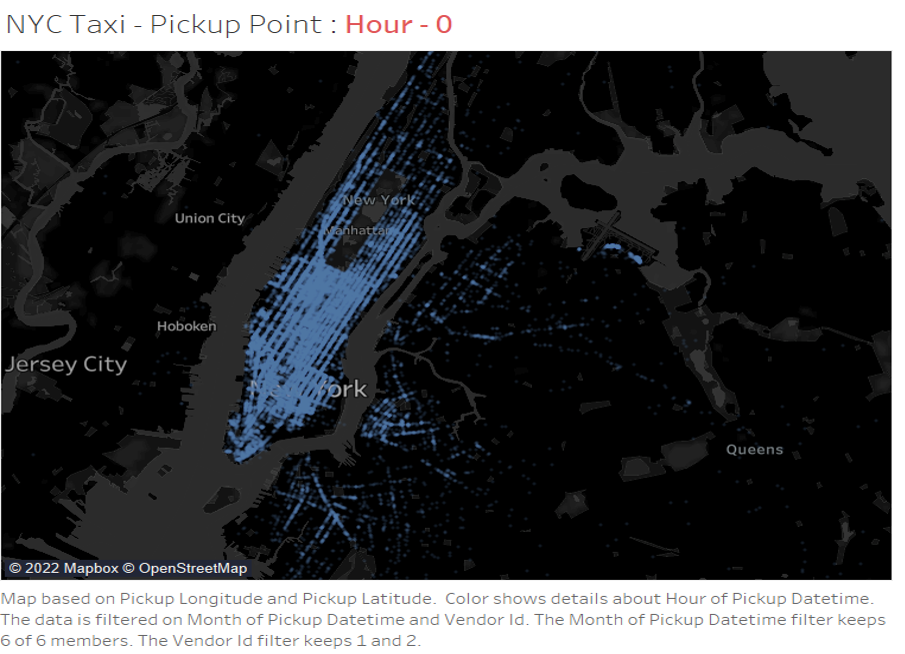

*(Screenshot taken of My Tableau Desktop)

* Some the pickup points reach far beyond the Land , probably in Sea which is impossible Trip, how can a taxi trip begin in Ocean ?



## **Dropoff-Points analysis**

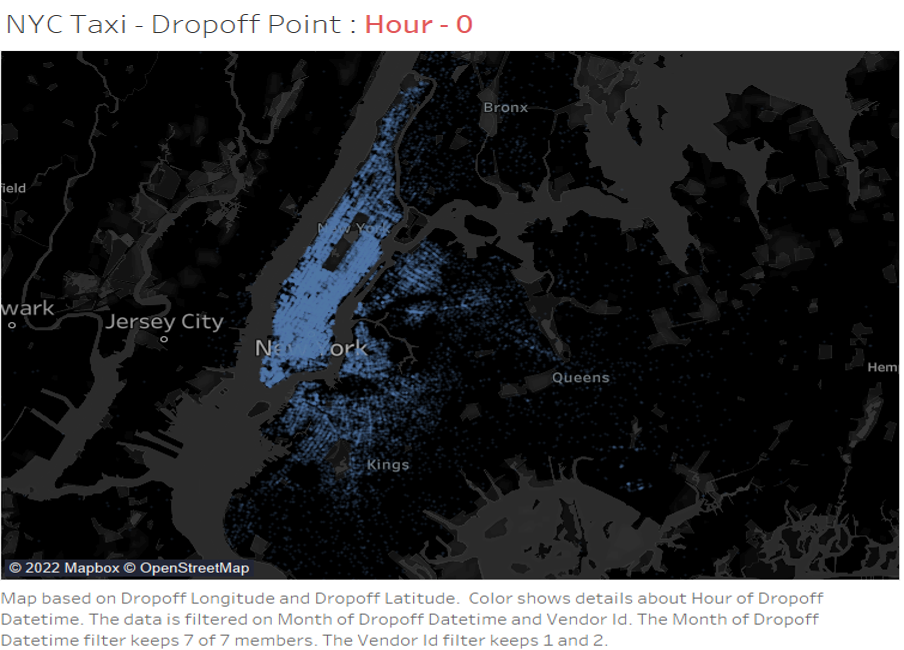

* It’s evident from the above pickup and dropoff points which lead in the North Atlantic Sea, these are the data points responsible for 350000 seconds (972 Hours) trip duration, we can conclude them as outliers.

In [28]:
#Removed unwanted columns

data= data.drop(['id', 'pickup_datetime', 'dropoff_datetime','pickup_date'], axis=1 )

In [29]:
data.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,17,24,0,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,0,43,6,54


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  int64  
 7   trip_duration       1458644 non-null  int64  
 8   pickup_day          1458644 non-null  int64  
 9   pickup_month        1458644 non-null  int64  
 10  pickup_hour         1458644 non-null  int64  
 11  pickup_min          1458644 non-null  int64  
 12  pickup_weekday      1458644 non-null  int64  
 13  dropoff_min         1458644 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 155.8 MB


In [31]:
data.shape

(1458644, 14)

In [32]:
#correlation

data.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,-0.079872,0.020304,0.000734,-0.006221,0.009299,-0.000388,0.001311,-0.000240
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,-0.021815,0.008471,0.002014,-0.002143,0.009101,0.000961,0.025191,-0.000047
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.010799,0.026542,-0.000874,0.004474,0.010150,-0.002597,-0.016356,-0.001366
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.008223,-0.029204,-0.006495,-0.001439,0.010603,0.001427,-0.028976,0.001057
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.008226,0.014678,-0.000456,0.004758,-0.022455,-0.002603,-0.001130,-0.001983
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.009818,-0.020677,-0.005561,-0.000607,0.013612,0.001961,-0.021762,0.000531
store_and_fwd_flag,-0.079872,-0.021815,0.010799,-0.008223,0.008226,-0.009818,1.000000,0.001724,0.001094,0.000403,0.002245,0.000212,-0.003952,0.000282
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,0.001724,1.000000,0.000566,0.006607,0.003690,-0.002338,-0.000708,-0.003732
pickup_day,0.000734,0.002014,-0.000874,-0.006495,-0.000456,-0.005561,0.001094,0.000566,1.000000,-0.015135,0.000414,-0.000147,0.004365,0.000141
pickup_month,-0.006221,-0.002143,0.004474,-0.001439,0.004758,-0.000607,0.000403,0.006607,-0.015135,1.000000,-0.003438,-0.001066,-0.014544,-0.000371


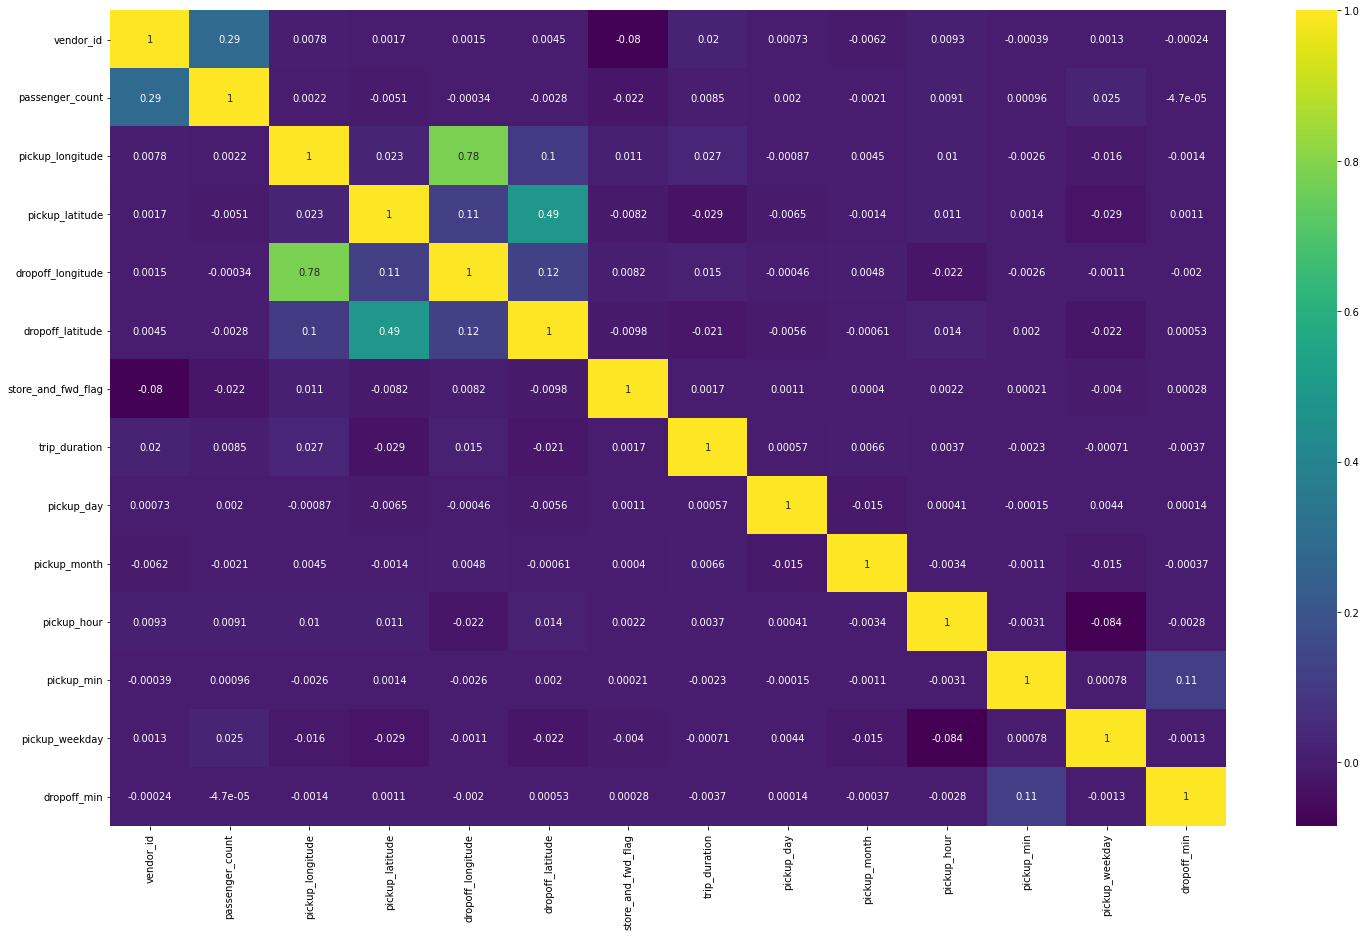

In [33]:
#correlation heatmap

plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

Text(0.5, 1.0, 'Log Transformed - Trip Duration')

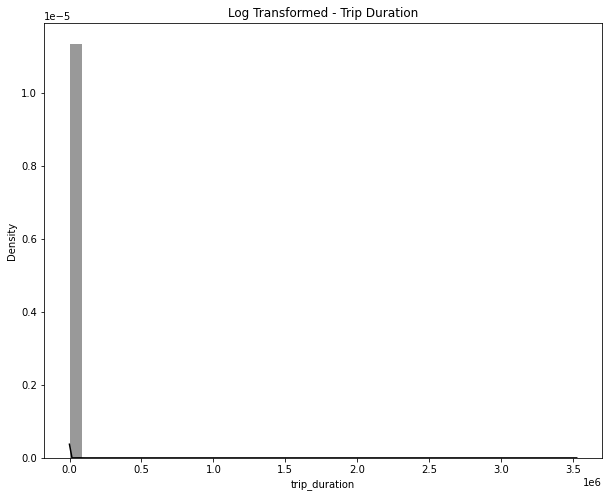

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(data['trip_duration'], hist=True, kde=True, color='black', bins=40)
plt.title("Log Transformed - Trip Duration")

Text(0.5, 1.0, 'Log Transformed - Trip Duration')

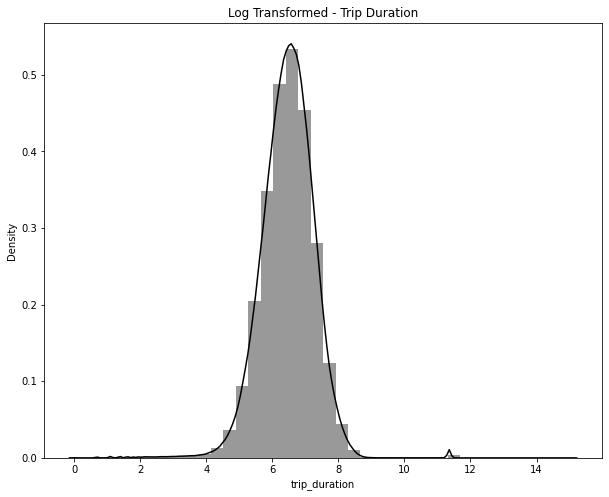

In [35]:

plt.figure(figsize=(10,8))
sns.distplot(np.log(data['trip_duration']), hist=True, kde=True, color='black', bins=40)
plt.title("Log Transformed - Trip Duration")

In [36]:
#set the Predictors and target variable

x = data.drop(columns=['trip_duration'], axis=1)
y = np.log(data['trip_duration'])

In [37]:
#Normalising Predictors
from sklearn.preprocessing import StandardScaler

cols = x.columns
scaler = StandardScaler()
new_data = scaler.fit_transform(x)
new_data = pd.DataFrame(new_data , columns=cols)

In [38]:
new_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471,-0.172813,-0.307440,0.530263,-0.322670,-1.561062,0.136139
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471,-0.402616,1.477173,-2.126116,0.774030,1.509502,1.399039
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-0.074471,0.401692,-1.497182,-0.407283,0.312262,-1.049301,-1.126761
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.074471,-1.092023,0.287431,0.842778,0.139099,-0.537541,0.537971
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.074471,1.206001,-0.307440,-0.094768,0.023657,0.997741,0.480566


In [39]:
new_data.shape

(1458644, 13)

# **Decomposition: PCA**

In [40]:
#Applying PCA
from sklearn.decomposition import PCA
#n_components = len( new_data.columns)-1
n_components = len(new_data.columns)
pca = PCA(n_components)
pca.fit_transform(new_data)
var_ratio = pca.explained_variance_ratio_

In [41]:
var_ratio

array([0.14409795, 0.10874783, 0.10046737, 0.08575584, 0.08327229,
       0.07812324, 0.07600604, 0.0757774 , 0.07020683, 0.06811033,
       0.05427252, 0.03908354, 0.01607881])

Text(0, 0.5, 'variance')

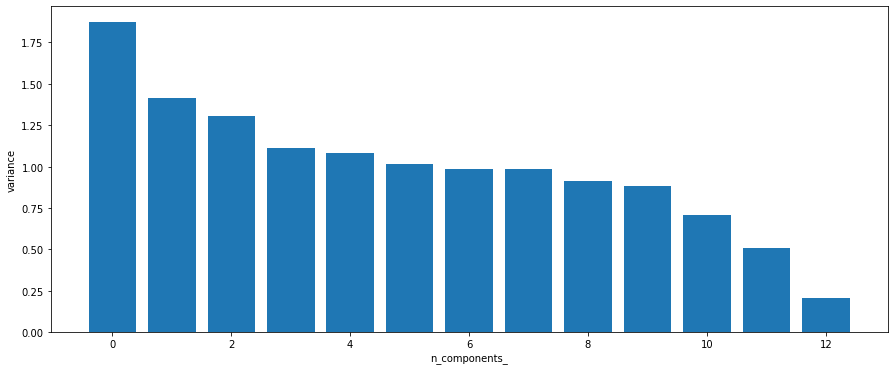

In [42]:
#variance ratio vs pc plot
plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_)
plt.xlabel('n_components_')
plt.ylabel('variance')


* Now that we’re done, we have to pass our Scaled Dataframe in PCA
model and observe the elbow plot to get better idea of explained
variance.

* At 12th component our PCA model seems to go Flat without explaining much of a Variance. 

Text(0.5, 1.0, 'Elbow Plot')

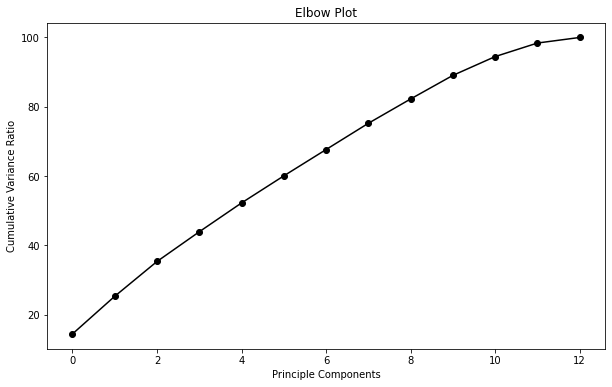

In [43]:
#cumulative variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_ratio)*100, marker='o', color='k')
plt.xlabel('Principle Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Elbow Plot')

In [44]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(new_data)
pca.explained_variance_

array([1.87327459, 1.4137228 , 1.30607674, 1.11482673, 1.08254045,
       1.01560276, 0.98807923, 0.9851069 , 0.91268938, 0.88543493,
       0.70554326, 0.50808643])

* Above , we had considered 12 as a required number of components and extracted new features name as transform by transforming the Data.

Text(0.5, 1.0, 'Contribution Of Particular Feature to Principal Components')

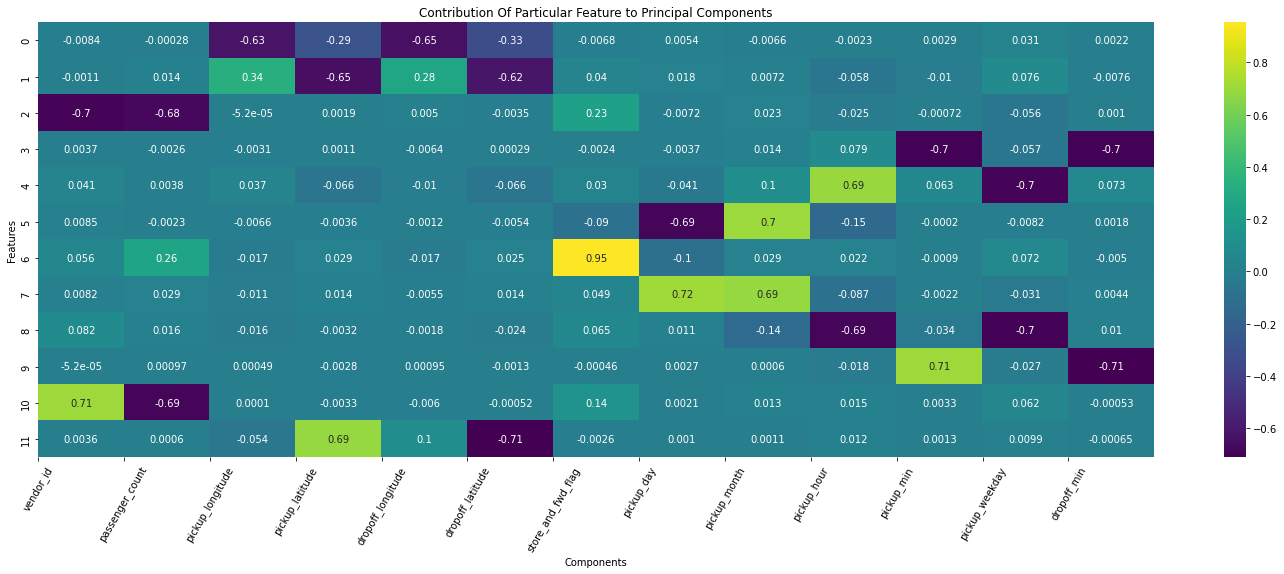

In [45]:
#importance of features in particular principal component

plt.figure(figsize=(25,8))
sns.heatmap(pca.components_, annot=True, cmap='viridis')
plt.xlabel('Components')
plt.ylabel('Features')
plt.xticks(np.arange(len(x.columns)), x.columns, rotation=60)
plt.title('Contribution Of Particular Feature to Principal Components')

* Above plot gives us detailed ideology of which feature has contributed more or less to our each Principal Component.

In [46]:
#Passing in Transformed values as Predcitors

x = transform
y=y

In [47]:
y

0          6.120297
1          6.496775
2          7.661056
3          6.061457
4          6.075346
             ...   
1458639    6.656727
1458640    6.484635
1458641    6.638568
1458642    5.921578
1458643    5.288267
Name: trip_duration, Length: 1458644, dtype: float64

In [48]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1021050, 12), (437594, 12), (1021050,), (437594,))

# **ML Model Prediction With PCA**

# **Linear Regression**

In [49]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
model = regressor.fit(x_train, y_train)


In [50]:
y_pred = model.predict(x_test)
y_pred

array([6.40949572, 6.38974715, 6.58234517, ..., 6.49740393, 6.39593293,
       6.55841163])

In [51]:
#examining scores
print('Training Score :', model.score(x_train, y_train))
print('Validation Score :', model.score(x_test, y_test))
print('Cross Validation Score :', cross_val_score(model, x_train, y_train, cv=5).mean())
print('R2_Score :' , r2_score(y_pred, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(y_pred, y_test)))

Training Score : 0.04244450511791209
Validation Score : 0.043892079955855645
Cross Validation Score : -0.048583442002601895
R2_Score : -23.101354376046718
RMSE :  0.7803432142847269


Text(0.5, 1.0, 'Test VS Prediction')

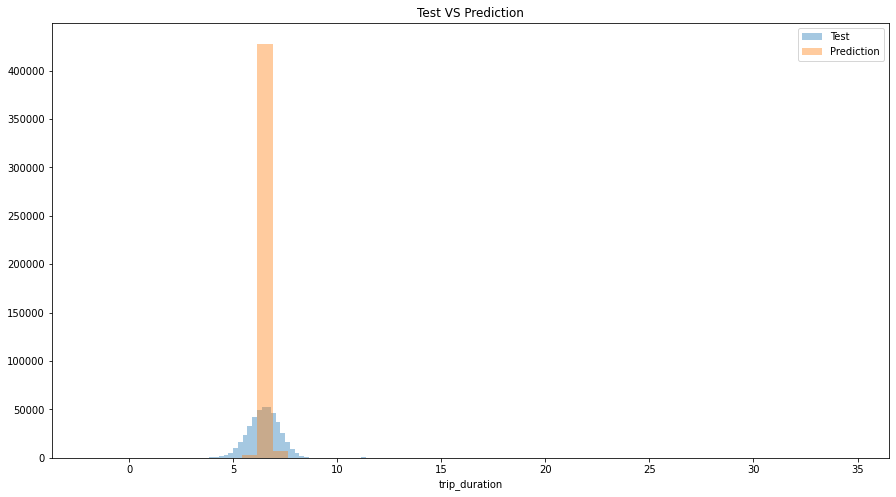

In [52]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred, kde=False, label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in Grey) and Predicted values (in Yellow) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

# **Decision Tree**

In [53]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion = 'mse', random_state = 100, max_depth=10,min_samples_leaf = 5)
model_dt = dt.fit(x_train,y_train)

In [54]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([6.58041548, 7.50473849, 6.16268944, ..., 6.96131518, 7.63217412,
       6.51030877])

In [55]:
#examining metrics
print('Training Score :', model_dt.score(x_train, y_train))
print('Validation Score :', model_dt.score(x_test, y_test))
print('cross Validation Score :', cross_val_score(model_dt,x_train, y_train).mean())
print('R2_Score :' , r2_score(y_pred_dt, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(y_pred_dt, y_test)))

Training Score : 0.924664590567693
Validation Score : 0.9175271115092601
cross Validation Score : 0.9152896692361591
R2_Score : 0.9109820644369714
RMSE :  0.2291858512303569


In [56]:
print("RMSLE : ", np.sqrt(mean_squared_log_error(y_pred_dt, y_test)))

RMSLE :  0.03754830972550162


Text(0.5, 1.0, 'Test VS Prediction (Model=DecisionTreeRegression)')

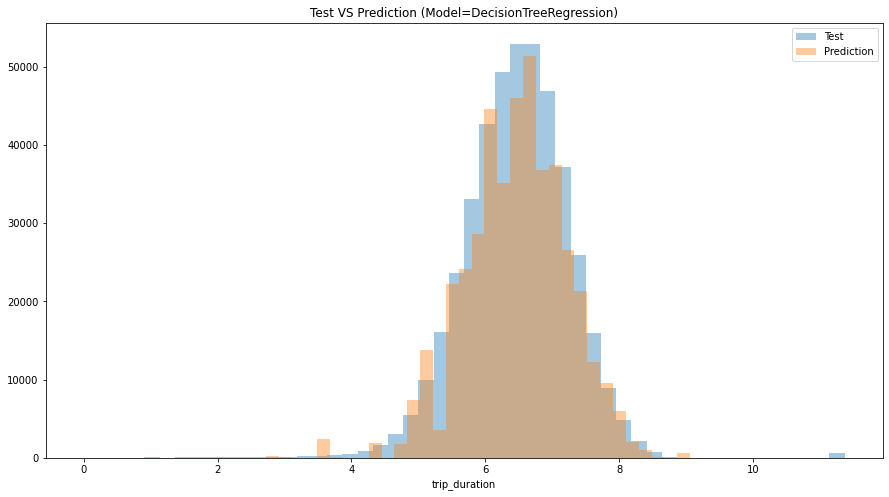

In [57]:
#prediction vs real data(Model=DecisionTreeRegression)

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_dt, kde=False, label="Prediction")
plt.legend()
plt.title("Test VS Prediction (Model=DecisionTreeRegression)")

* From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

# **Random Forest**

In [58]:
#Implementation Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion = 'mse', n_estimators = 5, max_depth=10)
model_rf = rf.fit(x_train, y_train)


In [59]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([6.56476297, 7.51169449, 6.16502399, ..., 6.96588787, 7.63901509,
       6.50174984])

In [60]:
#examining scores((Model=RandomForestRegressor))
print('Training Score :', model_rf.score(x_train, y_train))
print('Validation Score :', model_rf.score(x_test, y_test))
print('Cross Validation Score :', cross_val_score(model_rf, x_train, y_train, cv=5).mean())
print('R2_Score :' , r2_score(y_pred_rf, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(y_pred_rf, y_test)))

Training Score : 0.9287868426441817
Validation Score : 0.9231360669404467
Cross Validation Score : 0.9237639018689224
R2_Score : 0.9161161260729981
RMSE :  0.22125520789537087


In [61]:
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'Test VS Prediction (Model=RandomForestRegressor)')

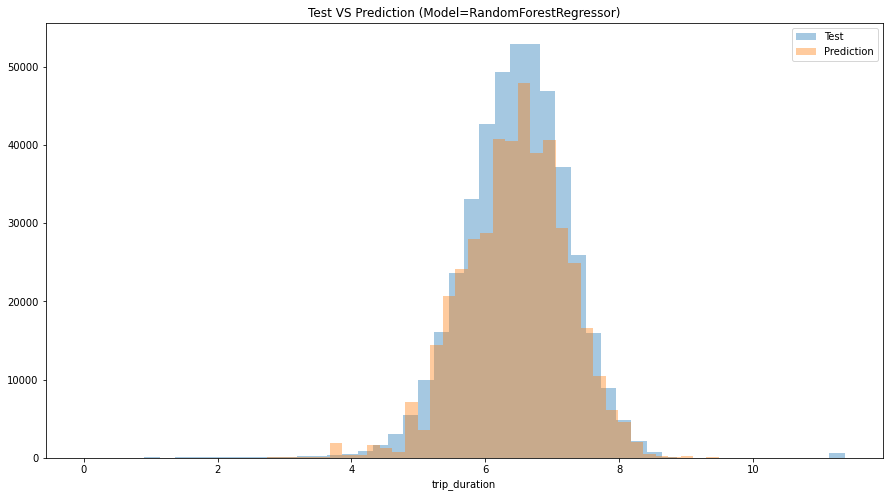

In [62]:
#prediction vs real data(Model=RandomForestRegressor)

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_rf, kde=False, label="Prediction")
plt.legend()
plt.title("Test VS Prediction (Model=RandomForestRegressor)")

* From the above Viz. we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (in Grey) and Predicted values (in Green) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.

# **R2 Scores Evaluation**

Text(0.5, 1.0, 'R2 Scores')

<Figure size 864x576 with 0 Axes>

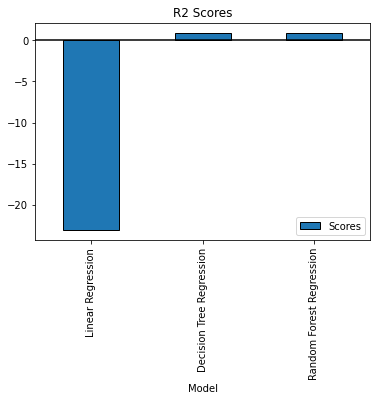

In [63]:
#r2 score plot for all 3 models

plt.figure(figsize=(12,8))
r2 = pd.DataFrame({'Scores':np.array([r2_score(y_pred, y_test), r2_score(y_pred_dt, y_test), r2_score(y_pred_rf, y_test)]), 'Model':np.array(['Linear Regression','Decision Tree Regression', 'Random Forest Regression'])})
r2.set_index('Model').plot(kind = 'bar',edgecolor='k')
plt.axhline(y=0, color='k')
plt.title('R2 Scores')

* Although , our Evaluation Metric isn't R2 Score but I'm just plotting them to check the Good Fit.

* We're getting good fit score for Decision Tree and Random Forest , i.e, close to 1.0

In [64]:
r2

,Scores,Model
0,-23.101354,Linear Regression
1,0.910982,Decision Tree Regression
2,0.916116,Random Forest Regression


# **RMSLE Evaluation**

Text(0.5, 1.0, 'R2 Scores')

<Figure size 864x576 with 0 Axes>

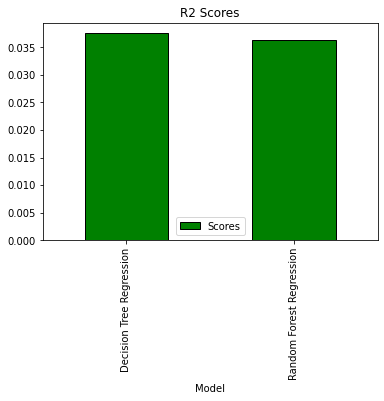

In [65]:
#RMSLE plot for all 3 models

plt.figure(figsize=(12,8))
RMSLE = pd.DataFrame({'Scores':np.array([np.sqrt(mean_squared_log_error(y_pred_dt, y_test)), np.sqrt(mean_squared_log_error(y_pred_rf, y_test))]), 'Model':np.array(['Decision Tree Regression', 'Random Forest Regression'])})
RMSLE.set_index('Model').plot(kind = 'bar', color='g', edgecolor='k')
plt.title('R2 Scores')

* We can observe from above Viz. that our Decision Tree model and Random Forest model are good performers. As, Random Forest is providing us reduced RMSLE, we can say that it's a model to Opt for.

# **Model Evaluation Result with PCA**

In [66]:
from tabulate import tabulate
print(tabulate([['Linear Regression', model.score(x_train, y_train), model.score(x_test, y_test),cross_val_score(model,x_train, y_train).mean(),r2_score(y_pred, y_test),np.sqrt(mean_squared_error(y_pred, y_test))],
                ['Decision Tree Regression', model_dt.score(x_train, y_train), model_dt.score(x_test, y_test),cross_val_score(model_dt,x_train, y_train).mean(),r2_score(y_pred_dt, y_test),np.sqrt(mean_squared_error(y_pred_dt, y_test)),np.sqrt(mean_squared_log_error(y_pred_dt, y_test))],
                ['Random Forest Regression',  model_rf.score(x_train, y_train), model_rf.score(x_test, y_test),cross_val_score(model_rf,x_train, y_train).mean(),r2_score(y_pred_rf, y_test),np.sqrt(mean_squared_error(y_pred_rf, y_test)),np.sqrt(mean_squared_log_error(y_pred_rf, y_test))]],
               headers=['Algorithm', 'Training Score', 'Validation Score','Cross Validation Score','R2 Score','RMSE', 'RMSLE']))

Algorithm                   Training Score    Validation Score    Cross Validation Score    R2 Score      RMSE      RMSLE
------------------------  ----------------  ------------------  ------------------------  ----------  --------  ---------
Linear Regression                0.0424445           0.0438921                -0.0485834  -23.1014    0.780343
Decision Tree Regression         0.924665            0.917527                  0.91529      0.910982  0.229186  0.0375483
Random Forest Regression         0.928787            0.923136                  0.924525     0.916116  0.221255  0.0362722


# **ML Model Prediction - Without PCA**

In [67]:
# Recreate dataset
X = new_data
y = y

In [68]:
X.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471,-0.172813,-0.307440,0.530263,-0.32267,-1.561062,0.136139
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471,-0.402616,1.477173,-2.126116,0.77403,1.509502,1.399039


In [69]:
y[0:2]

0    6.120297
1    6.496775
Name: trip_duration, dtype: float64

# **Linear Regression**

In [70]:
#splitting dataset into train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2 )

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1093983, 13), (364661, 13), (1093983,), (364661,))

In [72]:
#Implementing Linear regression

lr_1 = LinearRegression()
model_lr_1 = lr_1.fit(X_train,y_train)

In [73]:
y_pred_lr_1 = model_lr_1.predict(X_test)
y_pred_lr_1

array([6.66014383, 6.65476087, 6.75932353, ..., 6.55895248, 6.51297477,
       6.56938353])

In [74]:
#Intercept & Coef

model_lr_1.intercept_, model_lr_1.coef_

(6.465462804290958,
 array([ 0.01277905,  0.0129186 ,  0.09084105, -0.08415214, -0.00578614,
        -0.06791047,  0.01098566,  0.00802508,  0.03633152,  0.03002666,
        -0.00688967, -0.02185839, -0.0019538 ]))

In [75]:
#examining metrics
print('Traning Score:' ,model_lr_1.score(X_train, y_train))
print('validation Score:', model_lr_1.score(X_test, y_test))
print('cross validation Score:' ,cross_val_score(model_lr_1,X_train, y_train).mean())
print('R2 Score:', r2_score(y_pred_lr_1, y_test))


Traning Score: 0.0432401902248678
validation Score: 0.04667514604667511
cross validation Score: -0.04512351734986566
R2 Score: -23.829190398000026


In [76]:
print("RMSE : ", np.sqrt(mean_squared_error(y_pred_lr_1, y_test)))

RMSE :  0.7839113576651172


Text(0.5, 1.0, 'Test VS Prediction(Linear Regression without PCA)')

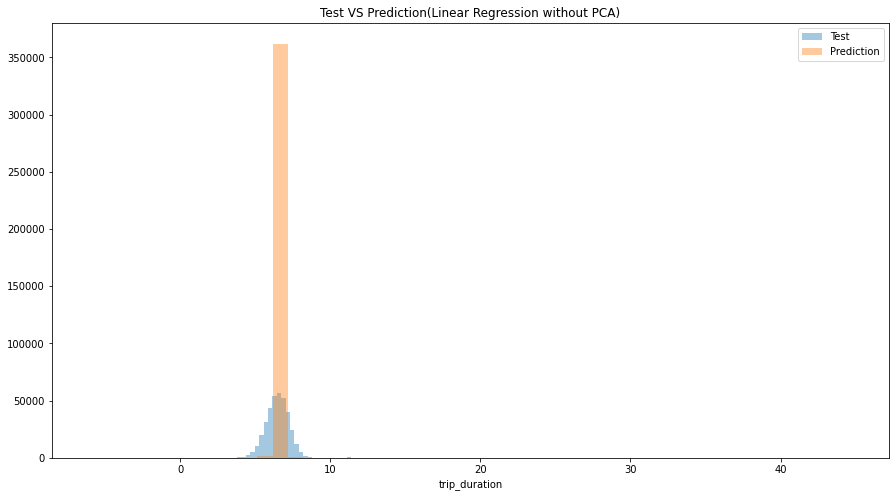

In [77]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_lr_1, kde=False, label="Prediction")
plt.legend()
plt.title("Test VS Prediction(Linear Regression without PCA)")

* Observations shows us that Linear Regression isn't performing well even with the second (without PCA) Approach.

# **Decision Tree**

In [78]:
#Implementing Decision Tree Regressor
dt_1 = DecisionTreeRegressor(criterion="mse", max_depth=10)
model_dt_1 = dt_1.fit(X_train, y_train)

In [79]:
y_pred_dt_1  = model_dt_1.predict(X_test)
y_pred_dt_1

array([7.00491496, 6.04124133, 6.47115677, ..., 6.14950937, 6.14950937,
       6.08602675])

In [80]:
#examining metrics
print('Traning Score:' ,model_dt_1.score(X_train, y_train))
print('validation Score:', model_dt_1.score(X_test, y_test))
print('cross validation Score:' ,cross_val_score(model_dt_1,X_train, y_train).mean())
print('R2 Score:', r2_score(y_pred_dt_1, y_test))
print('RMSLE :', np.sqrt(mean_squared_log_error(y_pred_dt_1, y_test)))


Traning Score: 0.4641229408058374
validation Score: 0.4570767507266633
cross validation Score: 0.4559007161138048
R2 Score: -0.18178041533013034
RMSLE : 0.08888747738403202


In [81]:
print("RMSE : ", np.sqrt(mean_squared_error(y_pred_dt_1, y_test)))


RMSE :  0.5915830454035739


Text(0.5, 1.0, 'Test VS Prediction(Decision Tree Regression(without PCA))')

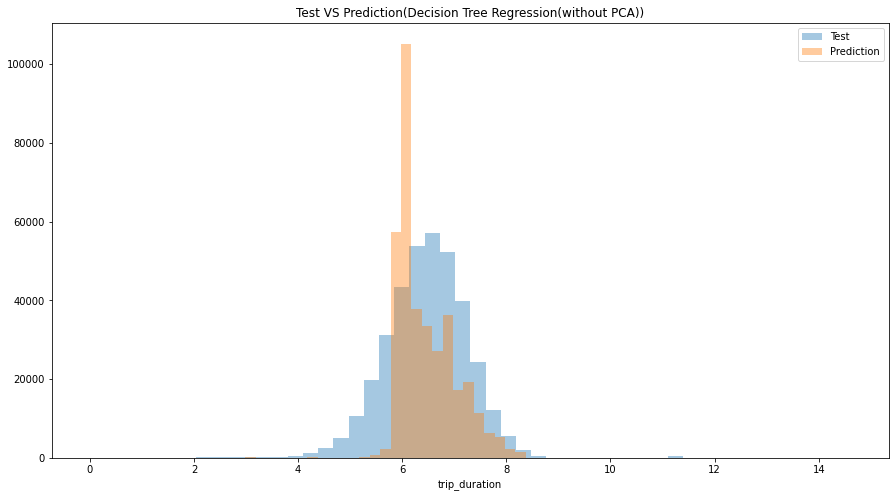

In [82]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False,  label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_dt_1, kde=False, label="Prediction")
plt.legend()
plt.title("Test VS Prediction(Decision Tree Regression(without PCA))")

* Considering our Null RMSLE 0.1146, this model gave us loss of 0.0878, we can say it is good but not the acceptable, knowing the fact that we got RMSLE of 0.037 in previous approach where we applied PCA.

# **Random Forest**

In [83]:
#implementation of forest algorithm

rf_1 = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
model_rf_1=rf_1.fit(X_train, y_train)


In [84]:
y_pred_rf_1 = model_rf_1.predict(X_test)
y_pred_rf_1

array([6.84846382, 6.02776715, 6.57705557, ..., 6.17257917, 6.17257917,
       5.98055126])

In [85]:
#examining metrics
print('Traning Score:' ,model_rf_1.score(X_train, y_train))
print('validation Score:', model_rf_1.score(X_test, y_test))
print('cross validation Score:' ,cross_val_score(model_rf_1,X_train, y_train).mean())
print('R2 Score:', r2_score(y_pred_rf_1, y_test))
print('RMSLE :', np.sqrt(mean_squared_log_error(y_pred_rf_1, y_test)))

Traning Score: 0.4797286923527283
validation Score: 0.4740063892326646
cross validation Score: 0.47125570426887686
R2 Score: -0.21124430731853172
RMSLE : 0.08777305389016064


In [86]:
print("RMSE : ", np.sqrt(mean_squared_error(y_pred_rf_1, y_test)))

RMSE :  0.5822865161282006


Text(0.5, 1.0, 'Test VS Prediction(Random Forest Regression(without PCA))')

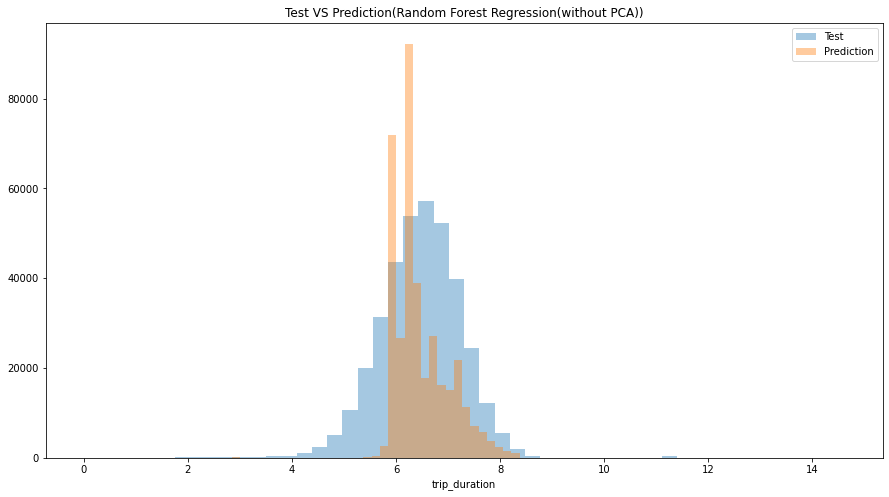

In [87]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False,  label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_rf_1, kde=False, label="Prediction")
plt.legend()
plt.title("Test VS Prediction(Random Forest Regression(without PCA))")

* Again the loss value we got here is 0.0870 is good when tried to match with Decision Tree's RMSLE ,i.e, 0.0878.

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x576 with 0 Axes>

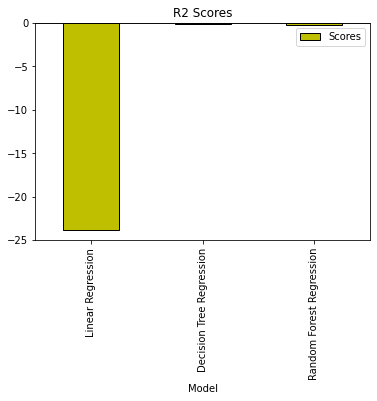

In [88]:
#R2 Score plot for all 3 models
plt.figure(figsize=(10,8))
r2_1 = pd.DataFrame({'Scores':np.array([r2_score(y_pred_lr_1, y_test),r2_score(y_pred_dt_1, y_test),r2_score(y_pred_rf_1, y_test)]),'Model':np.array(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'])})
r2_1.set_index('Model').plot(kind='bar',color='y', edgecolor='k')
plt.axhline(y=0, color='k')
plt.title('R2 Scores')

In [89]:
r2_1

,Scores,Model
0,-23.829190,Linear Regression
1,-0.181780,Decision Tree Regression
2,-0.211244,Random Forest Regression


Text(0.5, 1.0, 'RMSLE ')

<Figure size 720x576 with 0 Axes>

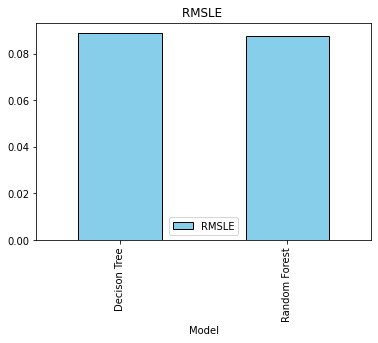

In [90]:
#RMSLE plot

plt.figure(figsize=(10,8))
RMSLE = pd.DataFrame({'RMSLE':np.array([np.sqrt(mean_squared_log_error(y_pred_dt_1, y_test)), np.sqrt(mean_squared_log_error(y_pred_rf_1, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
RMSLE.set_index('Model').plot(kind="bar", color="skyblue", edgecolor='k')
plt.title("RMSLE ")

# **Model Evaluation Result without PCA**

In [91]:
'''
from tabulate import tabulate
print(tabulate([['Linear Regression', model_lr_1.score(x_train, y_train), model_lr_1.score(x_test, y_test),cross_val_score(model_lr_1,x_train, y_train).mean(),r2_score(y_pred, y_test),np.sqrt(mean_squared_error(y_pred, y_test))],
                ['Decision Tree Regression', model_dt_1.score(x_train, y_train), model_dt_1.score(x_test, y_test),cross_val_score(model_dt_1,x_train, y_train).mean(),r2_score(y_pred_dt_1, y_test),np.sqrt(mean_squared_error(y_pred_dt_1, y_test)),np.sqrt(mean_squared_log_error(y_pred_dt_1, y_test))],
                ['Random Forest Regression',  model_rf_1.score(x_train, y_train), model_rf_1.score(x_test, y_test),cross_val_score(model_rf_1,x_train, y_train).mean(),r2_score(y_pred_rf_1, y_test),np.sqrt(mean_squared_error(y_pred_rf_1, y_test)),np.sqrt(mean_squared_log_error(y_pred_rf_1, y_test))]],
               headers=['Algorithm', 'Training Score', 'Validation Score','Cross Validation Score','R2 Score','RMSE', 'RMSLE']))
               '''
               

"\nfrom tabulate import tabulate\nprint(tabulate([['Linear Regression', model_lr_1.score(x_train, y_train), model_lr_1.score(x_test, y_test),cross_val_score(model_lr_1,x_train, y_train).mean(),r2_score(y_pred, y_test),np.sqrt(mean_squared_error(y_pred, y_test))],\n                ['Decision Tree Regression', model_dt_1.score(x_train, y_train), model_dt_1.score(x_test, y_test),cross_val_score(model_dt_1,x_train, y_train).mean(),r2_score(y_pred_dt_1, y_test),np.sqrt(mean_squared_error(y_pred_dt_1, y_test)),np.sqrt(mean_squared_log_error(y_pred_dt_1, y_test))],\n                ['Random Forest Regression',  model_rf_1.score(x_train, y_train), model_rf_1.score(x_test, y_test),cross_val_score(model_rf_1,x_train, y_train).mean(),r2_score(y_pred_rf_1, y_test),np.sqrt(mean_squared_error(y_pred_rf_1, y_test)),np.sqrt(mean_squared_log_error(y_pred_rf_1, y_test))]],\n               headers=['Algorithm', 'Training Score', 'Validation Score','Cross Validation Score','R2 Score','RMSE', 'RMSLE']))\n 

In [92]:
from tabulate import tabulate
print(tabulate([['Linear Regression', 0.04324,0.04667,-0.04512,-23.829,0.78391,'----'],
                ['Decision Tree Regression',0.046412,0.45745,0.44592,-0.181539,0.59137,0.08880],
                ['Random Forest Regression', 0.47387,0.468094,0.471042,-0.200574,0.58554,0.0881577]],
               headers=['Algorithm', 'Training Score', 'Validation Score','Cross Validation Score','R2 Score','RMSE', 'RMSLE']))
               

Algorithm                   Training Score    Validation Score    Cross Validation Score    R2 Score     RMSE  RMSLE
------------------------  ----------------  ------------------  ------------------------  ----------  -------  ---------
Linear Regression                 0.04324             0.04667                  -0.04512   -23.829     0.78391  ----
Decision Tree Regression          0.046412            0.45745                   0.44592    -0.181539  0.59137  0.0888
Random Forest Regression          0.47387             0.468094                  0.471042   -0.200574  0.58554  0.0881577


# **Conclusion**

* Observed which taxi service provider is most Frequently used by New Yorkers.

* Found out few trips which were of duration 528 Hours to 972 Hours, possibly Outliers.

* Passenger count Analysis showed us that there were few trips with Zero Passengers.

* Monthly trip analysis gives us a insight of Month – March and April marking the highest number of Trips while January marking lowest, possibly due to Snowfall.
